In [1]:
import calour as ca
%matplotlib notebook

# Load the American Gut dataset
We set log level to critical before loading since otherwise we get lots of warnings about missing samples (i.e. in mapping file but not in biom table)

Note the biom table is filtered for blooming bacteria (see Correcting for Microbial Blooms in Fecal Samples during Room-Temperature Shipping, Amir at al. 2017)

In [2]:
ca.set_log_level('CRITICAL')
dat=ca.read_amplicon('./ag.150.min10.16s.nobloom.withtax.biom','map.txt',normalize=10000,min_reads=1000)
ca.set_log_level('INFO')

# Divide to skin, feces and saliva samples

In [3]:
fec=dat.filter_samples('BODY_PRODUCT','UBERON:feces')
sal=dat.filter_samples('BODY_PRODUCT','UBERON:saliva')
skin=dat.filter_samples('BODY_PRODUCT','UBERON:sebum')

In [4]:
del dat

## Cluster bacteria by similar behavior, and add dbBact terms (out of 'feces','saliva','skin')

In [5]:
skinc=skin.cluster_features(10)

2017-09-03 11:03:32 INFO 5430 remaining


In [6]:
skinc.add_terms_to_features('dbbact',['feces','saliva','skin'])

AmpliconExperiment ag.150.min10.16s.nobloom.withtax.biom with 347 samples, 5430 features

In [7]:
skinc.feature_metadata.common_term.value_counts()

NA        1955
other     1551
feces      945
skin       512
saliva     467
Name: common_term, dtype: int64

In [8]:
skinc.feature_metadata.common_term = ['other' if i=='NA' else i for i in skinc.feature_metadata.common_term]

## plot all bacteria (fig S3-A)
We also use this figure to interactively look for interesting clusters, and store their coordinates using "print axes ranges" button

<IPython.core.display.Javascript object>


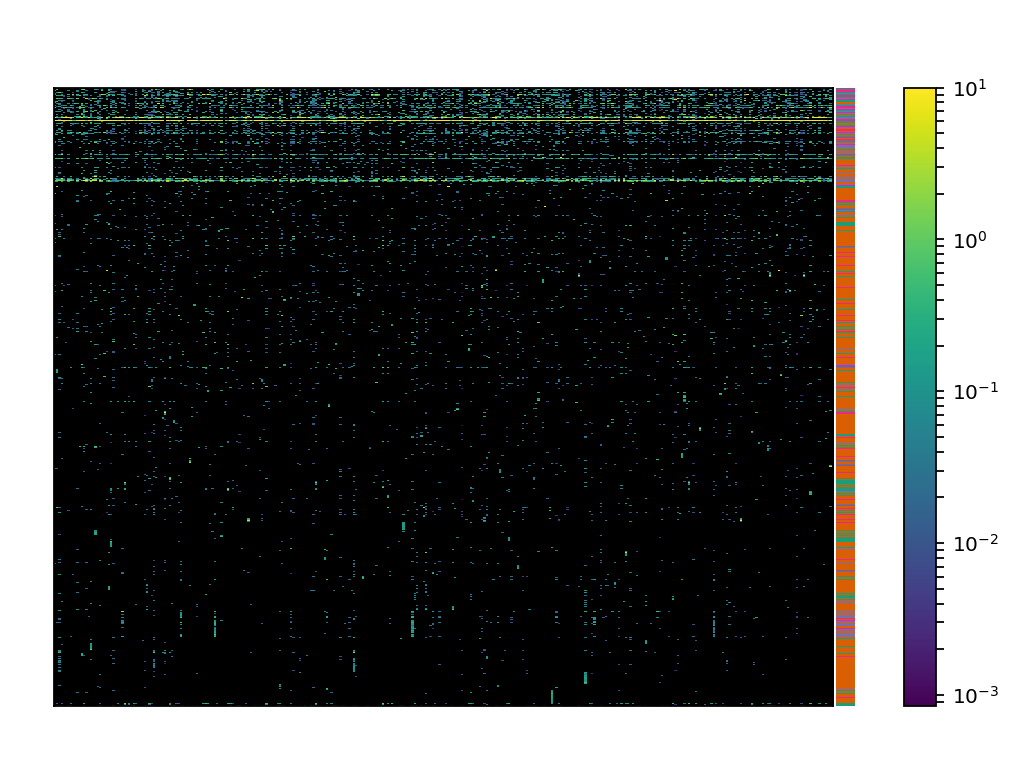

In [9]:
f=skinc.normalize(100).plot(gui='jupyter',feature_color_bars=['common_term'],color_bar_label=False,feature_field=None, clim=[0,10])

In [ ]:
f.save_figure('figure-S3A-ag-skin-all.pdf')

## plot skin cluster bacteria (fig S3-B)

<IPython.core.display.Javascript object>


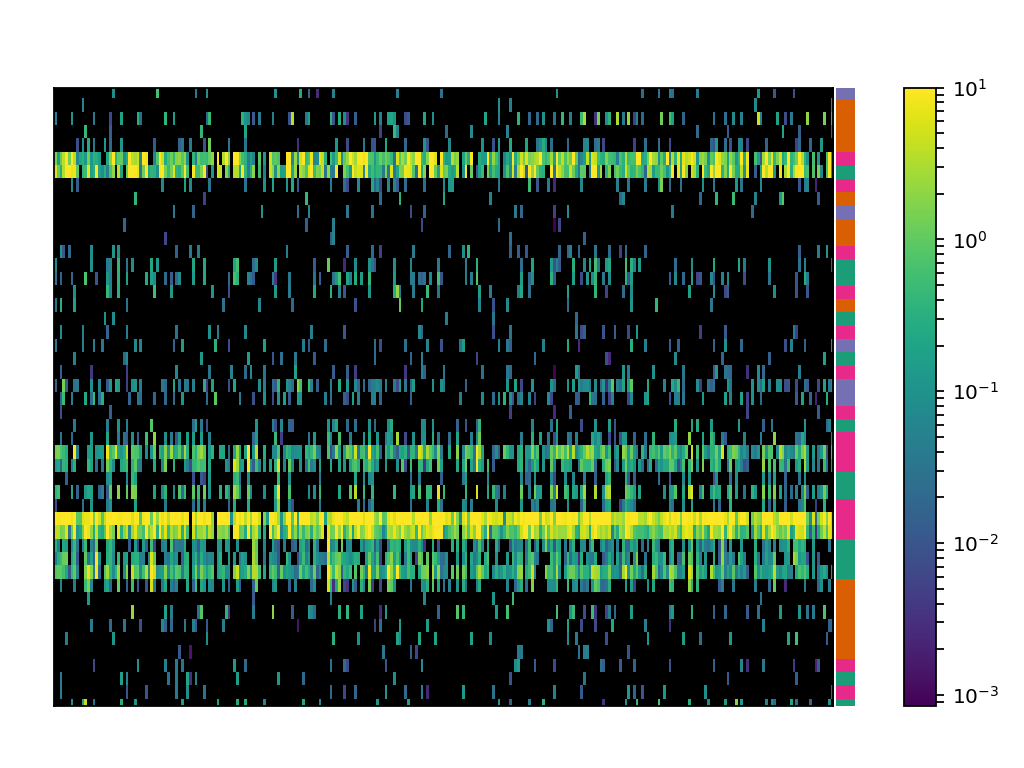

In [10]:
f=skinc.normalize(100).plot(gui='jupyter',feature_color_bars=['common_term'],color_bar_label=False, clim=[0,10],feature_field=None,rect=[-0.5, 282.5, 307.05859375, 260.63671875])

In [ ]:
f.save_figure('figure-S3B-ag-skin-cluster-skin.pdf')

## plot saliva cluster bacteria (fig S3-C)

<IPython.core.display.Javascript object>


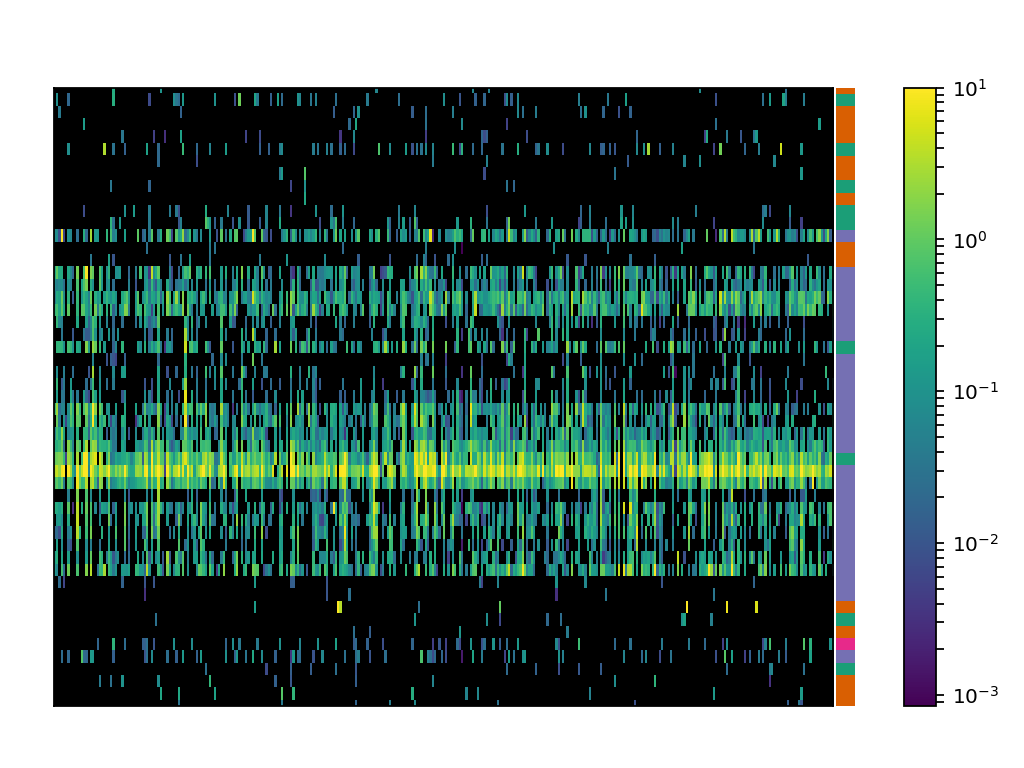

In [11]:
f=skinc.normalize(100).plot(gui='jupyter',feature_color_bars=['common_term'],color_bar_label=False,feature_field=None, rect=[-0.5, 346.5, 840, 790],clim=[0,10])

In [ ]:
f.save_figure('figure-S3C-ag-skin-saliva-cluster.pdf')

## plot the cluster to save the cluster bacteria to fasta file ("ag-skin-saliva-cluster.fa")
After marking them in the figure

In [ ]:
skinc.normalize(100).plot(gui='qt5',feature_color_bars=['common_term'],color_bar_label=False,feature_field=None, rect=[-0.5, 346.5, 840, 790],clim=[0,10])

# plot the taxa plot (Fig. S3-D)

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
zz=skin.filter_fasta('./ag-skin-saliva-cluster.fa')

<IPython.core.display.Javascript object>


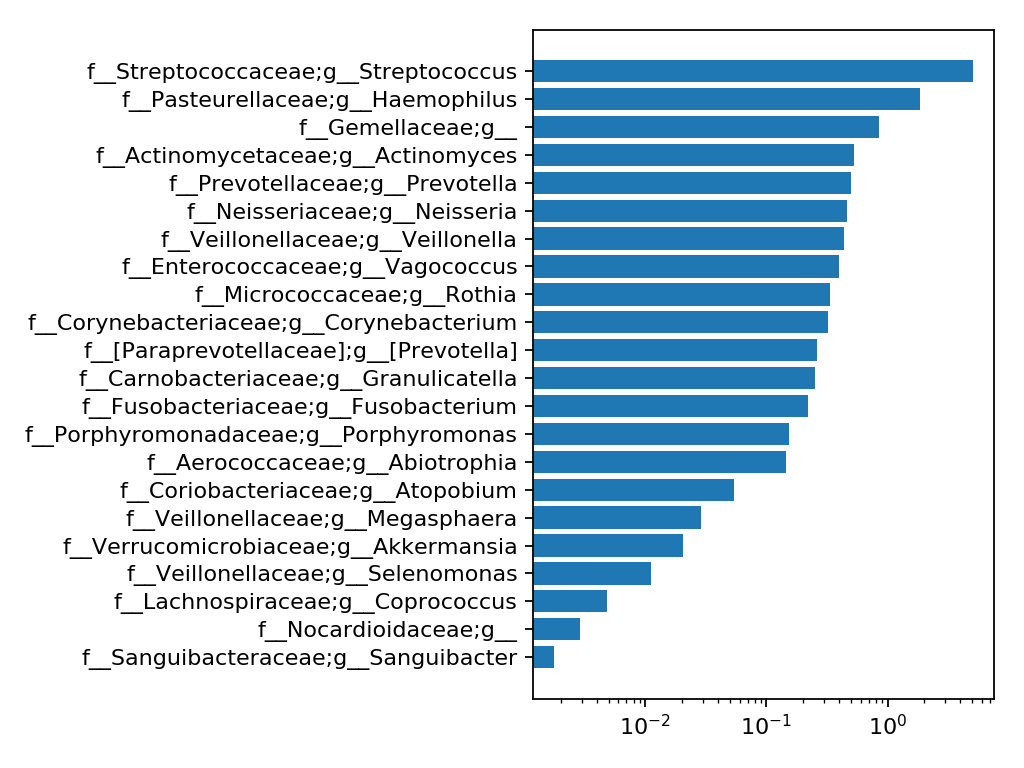

In [15]:
f = plt.figure()
zzz=zz.collapse_taxonomy()
zzz=zzz.sort_abundance(key='mean')
freq=[]
tax=[]
allmean = zzz.data.mean(axis=0)
for idx,cbact in enumerate(zzz.feature_metadata.index.values):
    ctax = zzz.feature_metadata.taxonomy[cbact].split(';')
    ctax = ';'.join(ctax[-2:])
    tax.append(ctax)
    freq.append(allmean[idx]/100)
plt.barh(np.arange(len(freq)),freq,align='center')
plt.xscale('log')
plt.yticks(np.arange(len(freq)),tax)
plt.tight_layout()

In [ ]:
f.savefig('figure-S3D-ag-skin-saliva-cluster-taxonomy.pdf')

## Find dbBact enriched terms for the saliva bacteria cluster compared to the rest of the bacteria in the experiment (Fig. S3-E)

In [16]:
res=skinc.enrichment(zz.feature_metadata.index.values,'dbbact')

<IPython.core.display.Javascript object>


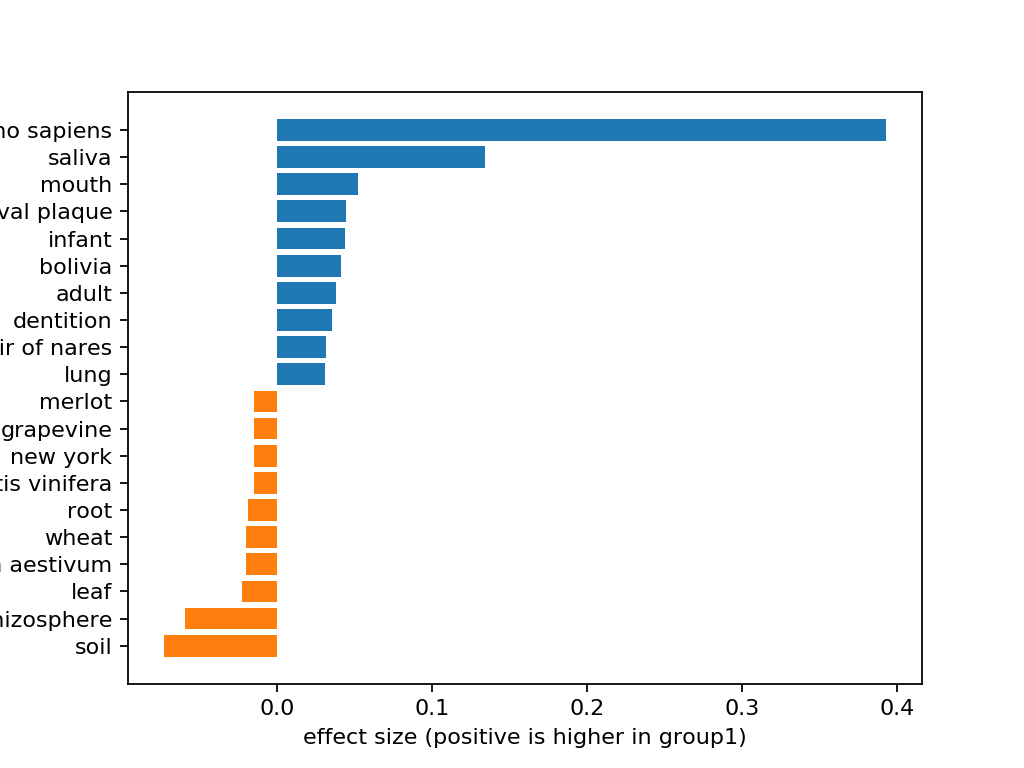

In [17]:
f=skinc.plot_enrichment(res,max_len=40)

In [ ]:
f.savefig('figure-S3E-ag-skin-saliva-cluster-terms.pdf')